#### Introduction
This is a data cleaning & feature enginnering project. The aim of this project is to prepare a dataset of 18k football players into one that is ready to be used as the raw data for a mathematical programming model. The data has been taken from FIFA 19 (a video game database) and is extremely messy.

In [1]:
#First import modules needed in this project
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math as mt
import seaborn as sb

In [2]:
#Now we need to import the datasets into seperate pandas df's
df = pd.read_csv('fifa19.csv', low_memory=False)

In [3]:
#Now lets inspect this data to get a better feel of what we're dealing with (FIFA19)
df.head()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [5]:
#Inspect the dize of the FIFA19 dataset
print(f'The FIFA19 dataset is made up of {df.shape[0]} rows and {df.shape[1]} columns. Each row refers to one football player.')

The FIFA19 dataset is made up of 18207 rows and 89 columns. Each row refers to one football player.


### 1. Removing Unneeded Columns & Renaming

#### 1.1. Removing Columns

In [6]:
#Present all the columns in the fifa dataset, what of these do we really need?
df.columns

Index(['Unnamed: 0', 'ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag',
       'Overall', 'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Special',
       'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Body Type', 'Real Face', 'Position',
       'Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until',
       'Height', 'Weight', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW',
       'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM',
       'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingT

In [7]:
#Here is the dataframe that contains all neccassery information for this project
df = df[['Name', 'Age', 'Nationality','Overall',
        'Club','Value', 'Wage','Position']]
df

,Name,Age,Nationality,Overall,Club,Value,Wage,Position
0,L. Messi,31,Argentina,94,FC Barcelona,€110.5M,€565K,RF
1,Cristiano Ronaldo,33,Portugal,94,Juventus,€77M,€405K,ST
2,Neymar Jr,26,Brazil,92,Paris Saint-Germain,€118.5M,€290K,LW
3,De Gea,27,Spain,91,Manchester United,€72M,€260K,GK
4,K. De Bruyne,27,Belgium,91,Manchester City,€102M,€355K,RCM
...,...,...,...,...,...,...,...,...
18202,J. Lundstram,19,England,47,Crewe Alexandra,€60K,€1K,CM
18203,N. Christoffersson,19,Sweden,47,Trelleborgs FF,€60K,€1K,ST
18204,B. Worman,16,England,47,Cambridge United,€60K,€1K,ST
18205,D. Walker-Rice,17,England,47,Tranmere Rovers,€60K,€1K,RW


#### 1.2. Renaming 'Overall' Column to 'Ability'

In [8]:
#Here we have changed the name of the Overall column to 'Ability'
df = df.set_axis(['Name', 'Age', 'Nationality','Ability',
        'Club','Value', 'Wage',
       'Position'], axis=1, inplace=False)

### 2. Missing data

In [9]:
#Check sum of missing data for each columns
df.isnull().sum().sort_values(ascending=False)

Club           241
Position        60
Wage             0
Value            0
Ability          0
Nationality      0
Age              0
Name             0
dtype: int64

In [10]:
#Drop missing positions. This is ok as there are very few.
df = df.dropna(subset=['Position'])

In [11]:
#re-check missing values
df.isnull().sum().sort_values(ascending=False)

Club           229
Position         0
Wage             0
Value            0
Ability          0
Nationality      0
Age              0
Name             0
dtype: int64

In [12]:
#We had to also remove null clubs as these players have a current wage of £0 and wouldn't work within our model.
df = df.dropna(subset=['Club'])

### 3. Data Cleaning

In [14]:
#Lets inspect the fifa19 df again, what needs to be cleaned?
df

,Name,Age,Nationality,Ability,Club,Value,Wage,Position
0,L. Messi,31,Argentina,94,FC Barcelona,€110.5M,€565K,RF
1,Cristiano Ronaldo,33,Portugal,94,Juventus,€77M,€405K,ST
2,Neymar Jr,26,Brazil,92,Paris Saint-Germain,€118.5M,€290K,LW
3,De Gea,27,Spain,91,Manchester United,€72M,€260K,GK
4,K. De Bruyne,27,Belgium,91,Manchester City,€102M,€355K,RCM
...,...,...,...,...,...,...,...,...
18202,J. Lundstram,19,England,47,Crewe Alexandra,€60K,€1K,CM
18203,N. Christoffersson,19,Sweden,47,Trelleborgs FF,€60K,€1K,ST
18204,B. Worman,16,England,47,Cambridge United,€60K,€1K,ST
18205,D. Walker-Rice,17,England,47,Tranmere Rovers,€60K,€1K,RW


Looking above we can see that the following must be done: 

1) Change Value column cells into numeric values of the same scale. E.g. 110.5 rather than €110.5M, and 0.06 rather than €60K.

2) Change Wage columns cells into numeric values and make the same scale as Value column (1=1m). E.g. 0.565 rather than €565K.

3) We then must convert both the cleaned Wage & Value column values from € to £ using an up-to-date conversion rate.

4) Finally we must make sure that the Position column values are mutually exclusive, and there are no overlapping positions as it seems there might be above. E.g. a RCM & a LCM are the same as a CM. 

#### 3.1. Cleaning the Value Column
The value columns contains values of €110.5M at the top, and €60k at the bottom. This is very problematic, not only is it not actually stored as a numeric value, the values are in two seperate scales (K's and M's)!

In [15]:
#Value: First identify what is K's and what is M's, then convert to float and scale accordingly
def millions_thousands (df):
    if df['Value'][-1] == 'M':
        df['K M'] = 1
    else:
        df['K M'] = 0
    return df

df = df.apply(millions_thousands, axis=1)

df['Value'] = df['Value'].str[1:-1]
df["Value"] = pd.to_numeric(df["Value"], downcast="float")
def scale_adjust_value (df):
    if df['K M'] == 1:
        df['Value'] = df['Value'] * 1000000
    else:
        df['Value'] = df['Value'] * 1000
    return df
df = df.apply(scale_adjust_value,axis=1)
df = df.drop('K M', axis = 1)
print(f'The minimum player value in the dataset is €{df.Value.min()} and the maximum value is €{df.Value.max()}')

The minimum player value in the dataset is €10000.0 and the maximum value is €118500000.0


#### 3.2. Cleaning the Wage Column
Although not as problematic as the Value column, the wage column still needs to be cleaned. Again, it is values such as €405k which isn't an actual numeric value in a pandas df. It is however all in the same scale (K's)

In [16]:
#Wage: Remove First and Last Characters, Convert to Float
df['Wage'] = df['Wage'].str[1:-1]
df["Wage"] = pd.to_numeric(df["Wage"], downcast="float")

#### 3.3. Scale & Convert Value & Wage

In [17]:
#Scale:Wage and Value (1 = 1m)
df['Value'] = df['Value'] / 1000000
df['Wage'] = df['Wage'] / 1000
print(f'The minimum wage is €{round(df.Wage.min(),4)}m\
 and the maximum wage is €{round(df.Wage.max(),3)}m')

The minimum wage is €0.001m and the maximum wage is €0.565m


In [20]:
#Value + Wage Column: € to £ FOR BOTH BURNLEY 25 AND EXTERNAL SET
df['Value'] = df['Value'] * 0.85
df['Wage'] = df['Wage'] * 0.85

In [21]:
#Now lets inspect the df again, do the Value & Wage columns look more appropriate?
df.head()

,Name,Age,Nationality,Ability,Club,Value,Wage,Position
0,L. Messi,31,Argentina,94,FC Barcelona,79.83625,0.408212,RF
1,Cristiano Ronaldo,33,Portugal,94,Juventus,55.63250,0.292613,ST
2,Neymar Jr,26,Brazil,92,Paris Saint-Germain,85.61625,0.209525,LW
3,De Gea,27,Spain,91,Manchester United,52.02000,0.187850,GK
4,K. De Bruyne,27,Belgium,91,Manchester City,73.69500,0.256487,RCM


In [22]:
#11 wages lost in cleaning (too small to recognise) simply delete
print(f'{df.isnull().sum().sort_values(ascending=False)}')
df = df.dropna(subset=['Value'])

Value          11
Position        0
Wage            0
Club            0
Ability         0
Nationality     0
Age             0
Name            0
dtype: int64


#### 3.4. Cleaning the Position Column
Looking at the position column even on the first 5 rows, we can see a Position of RCM. This could be problematic as a RCM is the same as a CM, in fact, RCM and LCM don't really exist, rather a player is a CM and not confined to the right or left side. This suggests that the positions in the dataset aren't mutually exclusive. We need to clean this column so that mutual exclusivity is achieved. 

In [23]:
#Inspect the value counts for the Position column
df.Position.value_counts()

#Look below for where the overlaps occur

#LCB, RCB = CB
#LDM, RDM = CDM
#LCM, RCM = CM
#LS, RS   = ST

ST     2130
GK     1989
CB     1751
CM     1377
LB     1304
RB     1268
RM     1114
LM     1086
CAM     946
CDM     936
RCB     652
LCB     635
LCM     389
RCM     387
LW      374
RW      365
RDM     246
LDM     239
LS      206
RS      201
RWB      87
LWB      78
CF       74
RAM      21
LAM      21
RF       16
LF       15
Name: Position, dtype: int64

In [24]:
#Clean Positions Column
#LS, RS = ST
def ST (df):
    if df['Position'] == 'RS':
        df['Position'] = 'ST'
    elif df['Position'] == 'LS':
        df['Position'] = 'ST'
    else:
        df['Position'] = df['Position']
    return df
#LCM, RCM = CM
def CM (df):
    if df['Position'] == 'LCM':
        df['Position'] = 'CM'
    elif df['Position'] == 'RCM':
        df['Position'] = 'CM'
    else:
        df['Position'] = df['Position']
    return df
#RDM, LDM = DM
def DM (df):
    if df['Position'] == 'LDM':
        df['Position'] = 'CDM'
    elif df['Position'] == 'RDM':
        df['Position'] = 'CDM'
    else:
        df['Position'] = df['Position']
    return df
#RCB, LCB = CB
def CB (df):
    if df['Position'] == 'RCB':
        df['Position'] = 'CB'
    elif df['Position'] == 'LCB':
        df['Position'] = 'CB'
    else:
        df['Position'] = df['Position']
    return df
df = df.apply(ST, axis = 1)
df = df.apply(CM, axis = 1)
df = df.apply(CB, axis = 1)
df = df.apply(DM, axis = 1)

In [25]:
#Check positions worked
df.Position.value_counts()

CB     3038
ST     2537
CM     2153
GK     1989
CDM    1421
LB     1304
RB     1268
RM     1114
LM     1086
CAM     946
LW      374
RW      365
RWB      87
LWB      78
CF       74
RAM      21
LAM      21
RF       16
LF       15
Name: Position, dtype: int64

### 4. Dealing with Nonsensical Data (Wages)

In [26]:
#First lets check that those with low wages are who we would expect (low quality,very young, or very old players)
low_wages_df = df[df.Wage < 0.001]
low_wages_df.sort_values('Ability', ascending=False).head(20)

,Name,Age,Nationality,Ability,Club,Value,Wage,Position
276,Mário Fernandes,27,Russia,82,PFC CSKA Moscow,13.36625,0.000723,RB
288,Marlos,30,Ukraine,82,Shakhtar Donetsk,15.17250,0.000723,RM
301,V. Ćorluka,32,Croatia,82,Lokomotiv Moscow,9.03125,0.000723,CB
286,Taison,30,Brazil,82,Shakhtar Donetsk,15.17250,0.000723,LM
381,F. Smolov,28,Russia,81,Lokomotiv Moscow,13.36625,0.000723,ST
386,B. Höwedes,30,Germany,81,Lokomotiv Moscow,9.39250,0.000723,CB
405,Manuel Fernandes,32,Portugal,81,Lokomotiv Moscow,10.11500,0.000723,LM
484,Y. Rakitskyi,28,Ukraine,80,Shakhtar Donetsk,8.67000,0.000723,CB
541,I. Akinfeev,32,Russia,80,PFC CSKA Moscow,6.14125,0.000723,GK
542,I. Denisov,34,Russia,80,Lokomotiv Moscow,3.25125,0.000723,CDM


Looking above we can see an issue. There seems to be many good quality players, at a good age, with high transfer values who have a wage of less than £1k. This is simply wrong. 

In [27]:
#This problem only seems to be the case for players with a wage of £0.86k a week.
low_wages = df[df.Wage < 0.00086]
low_wages

,Name,Age,Nationality,Ability,Club,Value,Wage,Position
276,Mário Fernandes,27,Russia,82,PFC CSKA Moscow,13.36625,0.000723,RB
286,Taison,30,Brazil,82,Shakhtar Donetsk,15.17250,0.000723,LM
288,Marlos,30,Ukraine,82,Shakhtar Donetsk,15.17250,0.000723,RM
301,V. Ćorluka,32,Croatia,82,Lokomotiv Moscow,9.03125,0.000723,CB
381,F. Smolov,28,Russia,81,Lokomotiv Moscow,13.36625,0.000723,ST
...,...,...,...,...,...,...,...,...
18202,J. Lundstram,19,England,47,Crewe Alexandra,0.04335,0.000723,CM
18203,N. Christoffersson,19,Sweden,47,Trelleborgs FF,0.04335,0.000723,ST
18204,B. Worman,16,England,47,Cambridge United,0.04335,0.000723,ST
18205,D. Walker-Rice,17,England,47,Tranmere Rovers,0.04335,0.000723,RW


To alleviate this issue we can simply remove these playuers from the dataset. Although it is over 4k players, we would still have over 12k avaliable which is way more than any club would realistically need. In reality we only need s tiny fragment of these players for the model to work. Additionally, any player with a true wage of £0.85k a week would not be a Burnley target as they simply wouldn't be goof enough for the Premier League. 

In [28]:
#Now we need to remove the subset of players with low wages
df = df.drop(low_wages.index)
print(f'The shape of the updated Dataframe is {df.shape[0]} rows and {df.shape[1]} columns.')

The shape of the updated Dataframe is 13041 rows and 8 columns.


In [29]:
#Now we need to check that those with a low value don't have too high of a rating UNLESS they are very old
#We would expect any 39 year old to have a small value no matter their ability rating out of 100
df[(df.Value < 1) & (df.Ability > 71)].head(10)

,Name,Age,Nationality,Ability,Club,Value,Wage,Position
554,S. Sorrentino,39,Italy,80,Chievo Verona,0.722500,0.007225,GK
926,Gomes,37,Brazil,77,Watford,0.433500,0.018063,GK
1287,W. Caballero,36,Argentina,76,Chelsea,0.722500,0.028178,GK
1294,A. Bizzarri,40,Argentina,76,Foggia,0.379312,0.001445,GK
1360,Beto,36,Portugal,76,Göztepe SK,0.722500,0.008670,GK
1625,D. Bonera,37,Italy,75,Villarreal CF,0.650250,0.013005,CB
1668,Rafael,36,Brazil,75,Cagliari,0.650250,0.010115,GK
1720,Iraizoz,37,Spain,75,Girona FC,0.325125,0.009393,GK
1788,A. Pérez,37,Colombia,75,Deportivo Cali,0.650250,0.001445,CDM
1789,B. Jones,36,Australia,75,Al Nassr,0.650250,0.012283,GK


The above subset checks out and makes sense. It mirrors the real world where the only players with high ratings that have a low value are those who are really old.

In [30]:
#Now we can check the min & max values for the ability and age columns
#We would expect ability to be no higher than 100 and no lower than 0 (as it is a 0-100 score)
#We would expect age to be no higher than around 50 and no lower than 15 or so 
#(as it is the age of PROFESSIONAL football players)

ability_min = df.Ability.min()
ability_max = df.Ability.max()
age_min = df.Age.min()
age_max = df.Age.max()

print(f'The minimum Ability in the DataFrame is {ability_min}')
print(f'The maximum Ability in the DataFrame is {ability_max}')
print(f'The minimum Age in the DataFrame is {age_min}')
print(f'The maximum Age in the DataFrame is {age_max}')

The minimum Ability in the DataFrame is 48
The maximum Ability in the DataFrame is 94
The minimum Age in the DataFrame is 16
The maximum Age in the DataFrame is 45


We can conclude from above that the age and abaility columns present us with no nonsensical data based on their min & max values.

array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Ability'}>],
       [<AxesSubplot:title={'center':'Value'}>,
        <AxesSubplot:title={'center':'Wage'}>]], dtype=object)

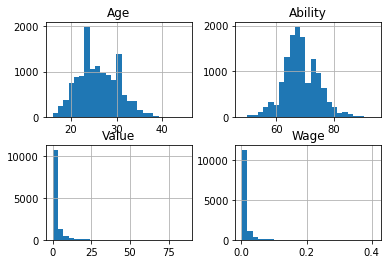

In [31]:
#Now we can check other continuous variables using a histogram matrix to check for capped values
df.hist(bins=25)

The age, ability, value & wage columns don't appear to have any capped values and therefore need no more cleaning.

In [32]:
print(f'At the end of the data cleaning stage the Dataframe contains {df.shape[0]} players and {df.shape[1]} rows.')

At the end of the data cleaning stage the Dataframe contains 13041 players and 8 rows.


### 5. Feature Engineering

We need the following columns (mostly binary) for easier modeling later in the study: Final Year, Plus 1 Year, HGP, Overseas, Own, Don't Own, GK, LB, CB, RB, LM, CM, RM, ST, Loan Target (more 'scouting'), Actual Value, Actual Wage.

#### 5.1. Final Year / Plus One Year (of Contract)

In [33]:
#Two new binary columns: final year or plus one year of contract?
def final_year (df):
    for x in df:
        if df['Name'] == 'S. Arfield' or df['Name'] == 'D. Marney':
            df['Final Year'] = 1
        else:
            df['Final Year'] = 0
        return df

def plus_one_year (df):
    for x in df:
        if df['Final Year'] == 1:
            df['Plus One Year'] = 0
        else:
            df['Plus One Year'] = 1
        return df

df = df.apply(final_year, axis = 1)
df = df.apply(plus_one_year, axis = 1)

#### 5.2. Home Grown Player (HGP) or Overseas Player?

In [34]:
#Two binary columns: HGP or Overseas Player?
def HGP (df):
    for x in df:
        if df['Nationality'] == 'England' or df['Nationality'] == 'Wales':
            df['HGP'] = 1
        else:
            df['HGP'] = 0
        return df

def overseas (df):
    for x in df:
        if df['HGP'] == 0:
            df['Overseas'] = 1
        else:
            df['Overseas'] = 0 
        return df

df = df.apply(HGP, axis = 1)
df = df.apply(overseas, axis = 1)

#### 5.3. Is the Player Owned by Burnley or Not Owned by Burnley?

In [35]:
#Two binary columns, owned by Burnley, ond not owned by Burnley.
def owned (df):
    for x in df:
        if df['Club'] =='Burnley' and df['Name'] != 'G. Nkoudou':
            df['Owned'] = 1
        else:
            df['Owned'] = 0
        return df

def not_owned (df):
    for x in df:
        if df['Owned'] == 0:
            df['Not Owned'] = 1
        else:
            df['Not Owned'] = 0 
        return df

df = df.apply(owned, axis = 1)
df = df.apply(not_owned, axis = 1)

#### 5.4. New Binary Column for Each Position in Burnley's 4-4-2 Formation

In [36]:
#Binary columns for each position that are of use to BURNLEY
def GK (df):
    for x in df:
        if df['Position'] == 'GK':
            df['GK'] = 1
        else:
            df['GK'] = 0
        return df

def LB (df):
    for x in df:
        if df['Position'] == 'LB':
            df['LB'] = 1
        else:
            df['LB'] = 0
        return df

def CB (df):
    for x in df:
        if df['Position'] == 'CB':
            df['CB'] = 1
        else:
            df['CB'] = 0
        return df

def RB (df):
    for x in df:
        if df['Position'] == 'RB':
            df['RB'] = 1
        else:
            df['RB'] = 0
        return df

def LM (df):
    for x in df:
        if df['Position'] == 'LM':
            df['LM'] = 1
        else:
            df['LM'] = 0
        return df

def CDM (df):
    for x in df:
        if df['Position'] == 'CDM':
            df['CDM'] = 1
        else:
            df['CDM'] = 0
        return df
    
def CM (df):
    for x in df:
        if df['Position'] == 'CM':
            df['CM'] = 1
        else:
            df['CM'] = 0
        return df

def RM (df):
    for x in df:
        if df['Position'] == 'RM':
            df['RM'] = 1
        else:
            df['RM'] = 0
        return df

def ST (df):
    for x in df:
        if df['Position'] == 'ST':
            df['ST'] = 1
        else:
            df['ST'] = 0
        return df


df = df.apply(GK, axis = 1)
df = df.apply(LB, axis = 1)
df = df.apply(CB, axis = 1)
df = df.apply(RB, axis = 1)
df = df.apply(LM, axis = 1)
df = df.apply(CDM, axis = 1)
df = df.apply(CM, axis = 1)
df = df.apply(RM, axis = 1)
df = df.apply(ST, axis = 1)

#### 5.5. New 'Actual Value' Column (HGP's are more expensive)

In [37]:
#Set up actual value (HGP's are more expensive) (1.5 here is an educated assumption)
def actual_value (df):
    for x in df:
        if df['HGP'] == 1:
            df['Transfer Value'] = df['Value'] * 1.5
        else:
            df['Transfer Value'] = df['Value']
        return df

df = df.apply(actual_value, axis = 1)

#### 5.6. New 'Desired Wage' Column (need to pay more than current wage to sign new players / renew current players)

In [38]:
#Set up desired wage - 1.2*wage if need to renew or to sign external players
#This is an assumption
def actual_wage (df):
    for x in df:
        if df['Not Owned'] == 1 or df['Final Year'] == 1:
            df['Wage Demand'] = df['Wage'] * 1.20
        else:
            df['Wage Demand'] = df['Wage']
        return df

df = df.apply(actual_wage,axis = 1)

#### 5.7. Inspect Shape & Store Updated DataFrame 

In [39]:
print(f'After feature enginneering the Dataframe still has {df.shape[0]} rows, but now has {df.shape[1]} columns.')

After feature enginneering the Dataframe still has 13041 rows, but now has 25 columns.


In [40]:
#Read the cleaned and engineered data to a new file
df.to_csv('fifa_19_cleaned_engineered(not_scouted).csv')

### 6. Scouting

Now we need to mimic Burnley's scouting process. In other words we need to filter out players that wouldn't sign for burnley (maybe they are **too good**, or play for a **much better club**, or **play within the Champions League** maybe), then we also need to filter our players that Burnley don't want to sign (maybe they are **not good enough to play in the premier league**, or are **too old**). The aim here is to be left with a set of players that could and would sign for Burnley either as a transfer or a loan. This will help computation time, and make the results more realistic. For example it means the model cannot suggest to transfer in L. Suarez who would never make such a move from Barcelona to Burnley. Finally, we need to set up one more binery variable indicating is that player is a **loan target** or not.

In [41]:
#Load in the dataframe and take note of number of players before scouting begins
df = pd.read_csv('fifa_19_cleaned_engineered(not_scouted).csv')
players_before_scoutning = df.shape[0]

#### 6.1. Iidentify loan targets 

First we need to identify who are potential loan targets and who are not. For example a young player (aged 21 and under) who is rated 78/100 or below is a suitable loan target. This is because they are young meaning they need first team experience, and they are not so high rated that they are likely to be in the first team yet. Those older, or with better ability, are not a realistic loan target. 

We will now make a new binary column to identify loan targets.

In [42]:
#Set up new binary column 1 if loan target 0 if not
def loan_target (df):
    for x in df:
        if df['Age'] <= 21 and df['Ability'] <=78:
            df['Loan Target'] = 1
        else:
            df['Loan Target'] = 0 
        return df

df = df.apply(loan_target, axis = 1)

#### 6.2. Remove Players from Prestiguous Clubs (Exclusing Loan Targets)

To remove players from teams that are so good the player wouldn't make the switch to Burnley we must do two things. Firstly, we need to create a new column to identify who is in these clubs, and secondly we must remove those players.

In [43]:
#Ad a new binery feature to indicate being in the top 5 leagues (plus two exceptions) and 
# competing in the CL in either 17/18 or 18/19
def champions_league (df):
    for x in df:
        if df['Club'] == 'Atlético Madrid' and df['Loan Target'] < 1:
            df['CL'] = 1 
        elif df['Club'] == 'Borussia Dortmund' and df['Loan Target'] < 1:
            df['CL'] = 1
        elif df['Club'] == 'Juventus' and df['Loan Target'] < 1:
            df['CL'] = 1
        elif df['Club'] == 'AS Monaco' and df['Loan Target'] < 1:
            df['CL'] = 1
        elif df['Club'] == 'Paris Saint-Germain' and df['Loan Target'] < 1:
            df['CL'] = 1
        elif df['Club'] == 'Napoli' and df['Loan Target'] < 1:
            df['CL'] = 1
        elif df['Club'] == 'Liverpool' and df['Loan Target'] < 1:
            df['CL'] = 1
        elif df['Club'] == 'FC Bayern München' and df['Loan Target'] < 1:
            df['CL'] = 1
        elif df['Club'] == 'Real Madrid' and df['Loan Target'] < 1:
            df['CL'] = 1
        elif df['Club'] == 'Roma' and df['Loan Target'] < 1:
            df['CL'] = 1
        elif df['Club'] == 'FC Barcelona' and df['Loan Target'] < 1:
            df['CL'] = 1
        elif df['Club'] == 'Tottenham Hotspur' and df['Loan Target'] < 1:
            df['CL'] = 1
        elif df['Club'] == 'Inter' and df['Loan Target'] < 1:
            df['CL'] = 1
        elif df['Club'] == 'FC Schalke 04' and df['Loan Target'] < 1:
            df['CL'] = 1
        elif df['Club'] == 'Manchester City' and df['Loan Target'] < 1:
            df['CL'] = 1
        elif df['Club'] == 'Olympique de Marseille' and df['Loan Target'] < 1:
            df['CL'] = 1
        elif df['Club'] == 'TSG 1899 Hoffenheim' and df['Loan Target'] < 1:
            df['CL'] = 1
        elif df['Club'] == 'Manchester United' and df['Loan Target'] < 1:
            df['CL'] = 1
        elif df['Club'] == 'Valencia CF' and df['Loan Target'] < 1:
            df['CL'] = 1
        elif df['Club'] == 'Chelsea' and df['Loan Target'] < 1:
            df['CL'] = 1
        elif df['Club'] == 'Sevilla FC' and df['Loan Target'] < 1:
            df['CL'] = 1
        elif df['Club'] == 'RB Leipzig' and df['Loan Target'] < 1:
            df['CL'] = 1
        elif df['Club'] == 'FC Porto' and df['Loan Target'] < 1:
            df['CL'] = 1
        elif df['Club'] == 'CSKA Moscow' and df['Loan Target'] < 1:
            df['CL'] = 1
        elif df['Club'] == 'Milan' and df['Loan Target'] < 1:
            df['CL'] = 1
        elif df['Club'] == 'Arsenal' and df['Loan Target'] < 1:
            df['CL'] = 1
        else:
            df['CL'] = 0
        return df
df = df.apply(champions_league, axis = 1)

In [44]:
#Remove CL players that aren't loan targets
df1 = df[df.CL == 1]
df = df.drop(df1.index)
df = df.drop('CL', 1)

#### 6.3. Remove Players who are too Old

Burnley simply wouldn't buy a player that is 34, 35, 36, or 37 as they are too old to play. These players must therefore be removed in the scouting stage just as they would so in real life. 

In [45]:
#Here we create a subset of players who are above 33 years old and not already at burnley, then we drop the subset
too_old = df[(df.Age > 33) & (df.Club != 'Burnley')]
df = df.drop(too_old.index)
print(f'The new maximum Age in the DataFrame is {df.Age.max()}')

The new maximum Age in the DataFrame is 34


#### 6.4. Remove Players that are not Good Enough for the Premier League

Burnley play in the PL, the top UK division and the hardest league in the world. Players Burnley buy must be somewhar good enough to compete at this level. Therefore players who are nto good enough for Burnley's curtrentl level must be filtered out now just as they would be in real life. 

In [46]:
#Remove players with ratings less than 72 
x = df.shape[0]
not_good_enough = df[(df.Ability < 69) & (df.Club != 'Burnley')]
df = df.drop(not_good_enough.index)
y = df.shape[0]

print(f'We started with {x} players and went down to only {y} players. {x-y} players removed.')

We started with 11840 players and went down to only 5296 players. 6544 players removed.


#### 6.5. Check Total Player Count After Scouting Process

In [47]:
players_after_scouting = df.shape[0]
print(f'We started the scouting stage with {players_before_scoutning} players and finished on {players_after_scouting} players.\
\n\n\
{players_before_scoutning-players_after_scouting} players have been removed in the scouting process.')

We started the scouting stage with 13041 players and finished on 5296 players.

7745 players have been removed in the scouting process.


### 7. Describe Final Dataset

In [48]:
round(df[['Age', 'Ability', 'Value',
       'Wage', 'HGP',
       'Owned', 
       'Transfer Value', 'Wage Demand', 'Loan Target']].describe(),3)

,Age,Ability,Value,Wage,HGP,Owned,Transfer Value,Wage Demand,Loan Target
count,5296.000,5296.000,5296.000,5296.000,5296.000,5296.000,5296.000,5296.000,5296.000
mean,26.489,72.648,3.368,0.013,0.061,0.006,3.465,0.015,0.097
std,3.587,3.222,3.197,0.011,0.240,0.079,3.305,0.013,0.297
min,17.000,55.000,0.072,0.001,0.000,0.000,0.108,0.002,0.000
25%,24.000,70.000,1.300,0.005,0.000,0.000,1.300,0.006,0.000
50%,27.000,72.000,2.312,0.009,0.000,0.000,2.312,0.011,0.000
75%,29.000,75.000,4.335,0.017,0.000,0.000,4.696,0.020,0.000
max,34.000,87.000,37.570,0.170,1.000,1.000,37.570,0.204,1.000


In [49]:
order = [ 'RWB', 'LWB', 'RAM', 'LAM', 'CAM', 'RF', 'LF','RW', 'LW', 'CF', 'GK', 'LB', 'CB', 'RB', 'LM', 'CDM' ,'CM', 'RM', 'ST']

Text(0.5, 0, 'Frequency')

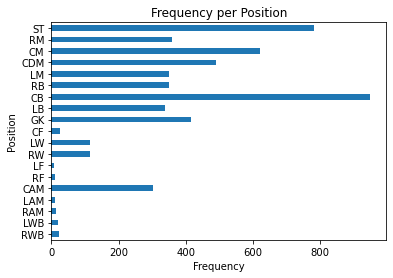

In [50]:
#Bar chart for players per position
position_bar = df['Position'].value_counts().loc[order].plot(kind='barh', rot=0, title = \
                                           'Frequency per Position')
position_bar.set_ylabel('Position')
position_bar.set_xlabel('Frequency')

In [51]:
#Read final dataset to a csv file to save for use once programming model has been built.
df.to_csv('FULL_DATASET.csv')